<center>
    <h1><u>Advanced deep learning</u></h1>
    <h2><i>Practical session</i></h2>
</center>

As we have seen in the previous class, there are numerous libraries to perform deep learning. Among this possible choices, some stand out more than the others, in particular Tensorflow/Keras and PyTorch (and some others too, obviously). While the former allows one to go deeper into mechanics of neural networks, the latter is a bit easier for the beginner, and has the advantage to ease GPU computations. For these reasons, we will be performing today's practical sessions using the PyTorch framework.

There are three practical sessions today. Each of them should take you about one hour fifteen. Take your time to explore things at your own rhythm, as the objective is to give you a first concrete experience in programming with neural networks. If you complete a part earlier, explore the following one, or have fun tweaking parameters to see the impact on the results. If on the other side you need more time to fully understand a notion, it's perfectly fine to dedicate two hours for a single part.

<h2>Part 1 - Familiarize with PyTorch</h2>

First, let's discover how PyTorch works. The documentation of the framework provides a very nice one-hour tutorial, which covers everything better than I could do if I wrote it myself :)

In the first part of this practical session, you are therefore asked to follow the link below, and explore all non-optional parts, i.e.,
1. What is PyTorch?
2. Autograd: automatic differentiation.
3. Neural networks.
4. Training a classifier.

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

<b><u>Exercise:</u></b> If you are already familiar with PyTorch, you can just read everything to refresh your memory. Otherwise, I would advise to reproduce the tutorial contents in chapters 3-4 below.

In [ ]:
# Retrouvez l'info dans pytorch tutorial

<b><u>Exercise (optional):</u></b> Change the network architecture in the link above to add a new Conv2D layer after the second one (and make sure everything works properly).

In [ ]:
# Retrouvez l'info dans pytorch tutorial

<h2>Part 2 - Transfer learning</h2>

Now that you are familiar with PyTorch basics, let's try to achieve something more practical. In this part of the practical session, you will use transfer learning to use a pre-trained convolutional neural network (CNN) and use it to classify images from a new -- and small -- dataset of bees and ants.

First, let's read a bit more about transfer learning. In the course you just had, I presented you some very generic ideas. While you should now understand why transfer learning is important, and what the role of the last layer in a CNN is, it may not be obvious of when to use fine tuning, which layers to freeze, etc. I advise you to read this short article, where some good rules of thumb are given in order to help you get more insights on these choices.

https://cs231n.github.io/transfer-learning/

Once again, some very good tutorials already exist in the PyTorch documentation, so let's follow an existing one (you can see that as a form of transfer learning too ;) ). In the following, you will learn how to replace the last layer of a CNN with a custom one that matches your task. Then, you will first fine tune the network entirely and, in a second step, train only the weights between the backbone of the CNN and your downstream classifier.

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

<b><u>Exercise:</u></b> This time, it is not only advised to run the codes from the link above in the notebook, but required, as the final trained CNN (variable <tt>model_conv</tt>) will serve as a starting point for <b>Part 3</b>. However, you are asked to adapt the code to work with <tt>vgg16</tt> instead of <tt>resnet18</tt>, as it will simplify <b>Part 3</b> quite a bit.

In [ ]:
# Check file Learning_Transfer

<b><u>Exercise:</u></b> Once you have followed everything from the link above, save the final trained model (<tt>model_conv</tt>) to a file. You can either save the <tt>state_dict</tt> as in the example in <b>Part 1</b>, or the entire model, as described here: https://pytorch.org/tutorials/beginner/saving_loading_models.html.

In [ ]:
# Check file Learning_Transfer

<b><u>Exercise (optional):</u></b> Now that you know how to train a CNN from scratch, and have experienced transfer learning, try to train a CNN on the dataset of ants and bees from the link above to see how it compares with the performance you achieve using transfer learning.

<h2>Part 3 - Neurons visualization</h2>

In this third part, we will try to understand what differenciates ants from bees according to the CNN we just fine-tuned. As a requirement to attack this part, you should have followed the tutorial on transfer learning in <b>Part 2</b>, as we will work on the CNN at the very end of the given link.

<b><u>Exercise:</u></b> Complete the following cell to load the model you trained in <b>Part 2</b>. If you only saved the <tt>state_dict</tt> and not the entire model, don't forget to change the downstream classifier of the network before loading the trained weights.

In [ ]:
model = # See in Neurons_Viz

<b><u>Exercise:</u></b> Now, let's have a look at the model layers. Just run the following cell.

In [ ]:
print(model.eval()) # See in Neurons_Viz

<b><u>Exercise (optional):</u></b> Alternatively, Tensorboard provides a nice framework for visalizing models (among other things). Run the following cell, and then start a tab with address http://localhost:6006. Then, click on the <i>GRAPHS</i> tab. You should be able to see how layers articulate. For more info on Tensorboard, you can check this link: https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html.

In [ ]:
# Prepare tensorboard
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# Load a few images from the ants&bees train set
dataiter = iter(dataloaders["train"])
images, labels = dataiter.next()

# Append model to board
writer.add_graph(model, images)
writer.close()

# Run tensorboard (alternatively, you can run this -- without the ! -- from the shell)
!tensorboard --logdir=runs

<b><u>Exercise:</u></b> Now, let's focus on feature map visualization. The following practical session draws inspiration from https://github.com/utkuozbulak/pytorch-cnn-visualizations. In order not to bother with data normalization details, we will use some pre-existing functions. Please run the following cells.

In [ ]:
!wget https://raw.githubusercontent.com/utkuozbulak/pytorch-cnn-visualizations/master/src/misc_functions.py -O misc_functions.py

In [ ]:
from misc_functions import *
import numpy as np
from torch.optim import Adam
import matplotlib.pyplot as plt

<b><u>Exercise:</u></b> OK, at this point we have everything we need to start optimizing an input image so that it activates more and more a single neuron (or multiple). Let's do that by running the following cell. You should read the comments to understand what is going on here. Then, try to visualize deeper layers to see what happens.

In [ ]:
# Function to optimize the input in order to maximize activation of a chosen neuron
def optimize_input_for_neuron (model, layer, neuron, lr=0.1, weight_decay=1e-6, iterations=30) :

    # Start with a (normalized) random image
    random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 3)))
    processed_image = preprocess_image(random_image, False)
    
    # Define optimizer for the image
    optimizer = Adam([processed_image], lr=lr, weight_decay=weight_decay)
    
    # Iterate for a number of epochs
    for it in range(iterations) :
        
        # Reset gradients
        optimizer.zero_grad()
        
        # Forward pass until we reach the layer of interest
        x = processed_image
        for i, model_layer in enumerate(model.features) :
            x = model_layer(x)
            if i == layer :
                break
        
        # We get the output at the neuron of interest within that layer
        output = x[0, neuron]
        
        # We want to optimize an input to activate this neuron as much as possible
        # Let's use that as the loss function to optimize
        # We want to minimize the negative loss (i.e., maximize neuron output)
        loss = -torch.mean(output)
        loss.backward()
        optimizer.step()
        
        # Let's print current state
        print('Iteration:', str(it), 'Loss:', "{0:.2f}".format(loss.data.numpy()))

    # Recreate final image
    return recreate_image(processed_image)

# Choose which neuron to visualize
target_layer = 20
target_neuron = 5

# Let's go!
result = optimize_input_for_neuron(model, target_layer, target_neuron)

# Visualize result
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.show()

<b><u>Exercise:</u></b> Visualize activation maps for all neurons of a chosen layer.

<b><u>Exercise:</u></b> Visualize activation maps for each of the output classes.

<b><u>Exercise (optional):</u></b> Initialize the optimization with an image of your choice.

<b><u>Exercise (optional):</u></b> Have a look at the following diagram (taken from https://hackernoon.com/dl06-deepdream-with-code-5f735052e21f. BTW, note the cool use of H.R. Giger's work!), which explains simply how recursive feature maps work. Then, update the codes above to use octaves.

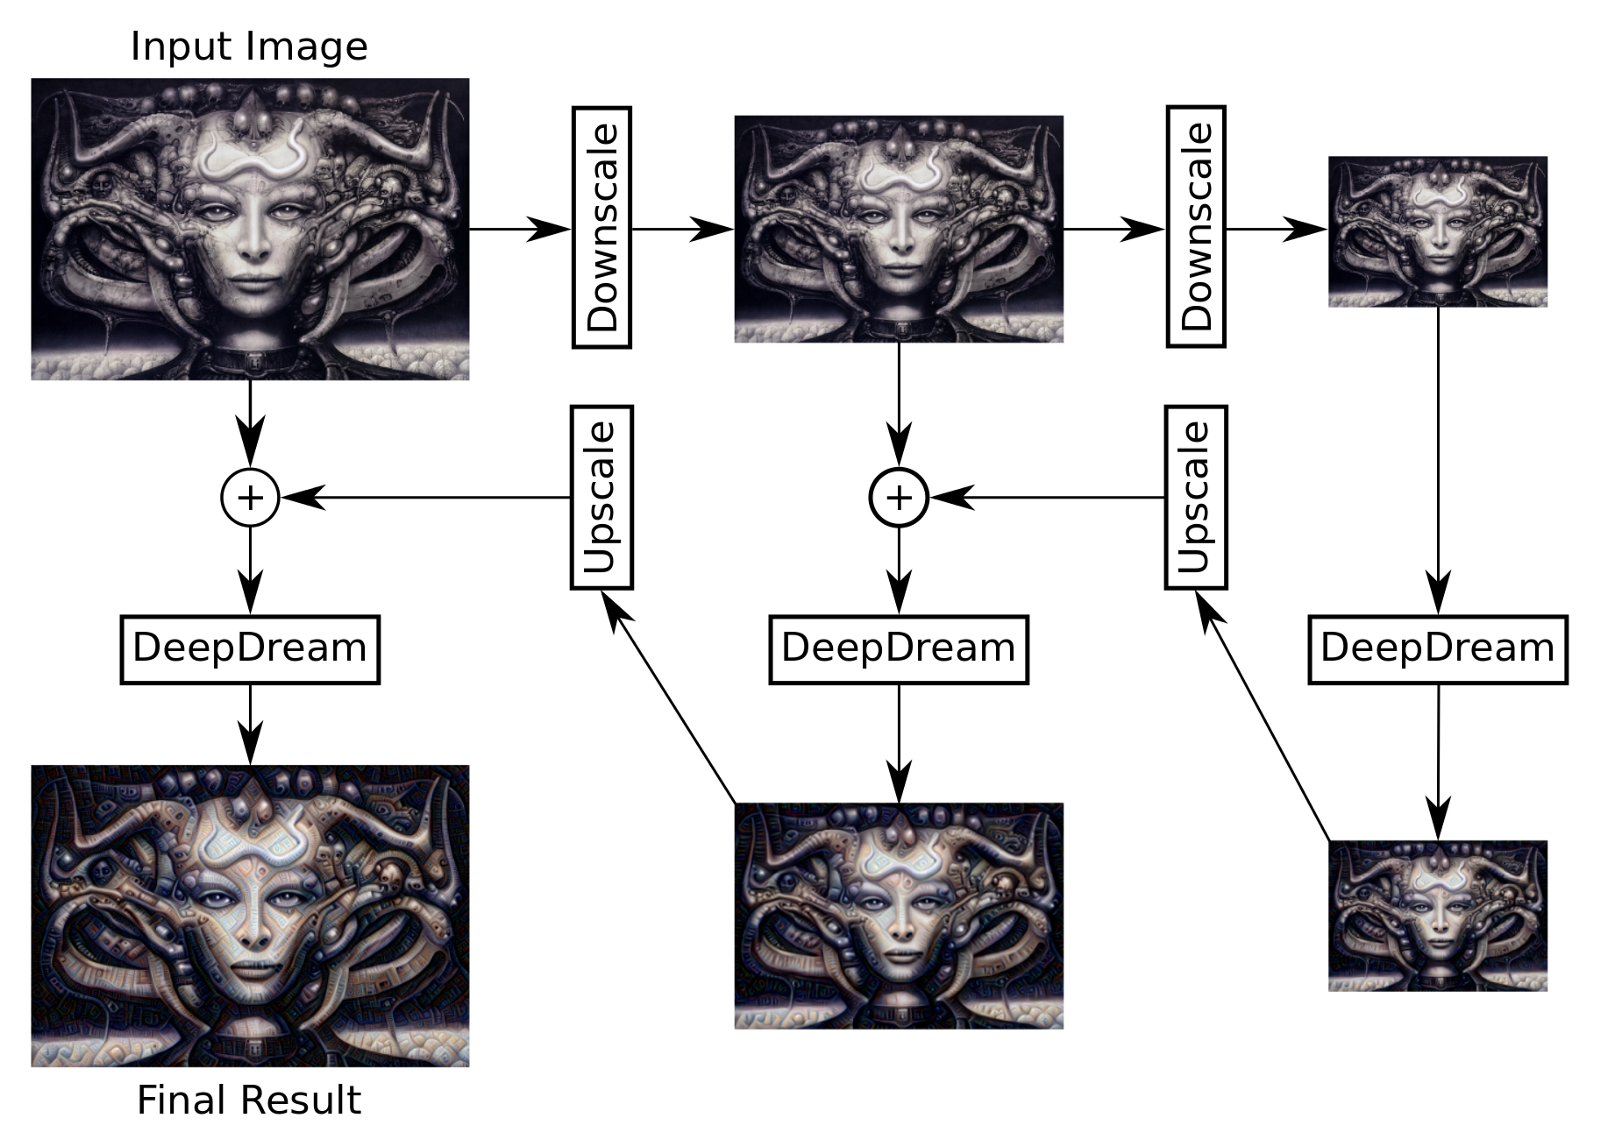

In [2]:
import IPython.display as display
display.Image("https://hackernoon.com/hn-images/1*SFgIqRXLDE03_sUWNnxFzQ.png")